Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, November 25, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

>- Complex numbers are denoted as $a + bi$ in which $a$ is the "real" part and $bi$ is the imaginary part. What makes the latter imaginary is the $i$, since $i^2 = -1$, a condition which no real number can fulfill.
>- Complex numbers are commonly visualized on the complex plane which is similar to a 2D coordinate system with one axis denoting the real part and the other denoting the imaginary part.

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

>- Take the complex number $z = a + bi$, the real part is denoted by $a$, the imaginary part is denoted by $bi$.
>- The absolute value of $z$ is $|z| = \sqrt{a^2 + b^2}$. It denotes its "magnitude".
>- The conjugate of $z$ is $z' = a - bi$. It denotes the "reflection" of $z$ at the real axis

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

>- The polar coordinate system is a 2D coordinate system in which each point on a plane is determined by a distance from a reference point (i.e. the pole) and an angle from a reference direction.
>- Polar coordinates $r$ and $\phi$ can be converted to Cartesian coordinates $x$ and $y$ by using sine and cosine: 
$$x = r cos \phi$$
$$y = r sin \phi$$

>- Cartesian coordinates $x$ and $y$ can be converted to polar coordinates $r$ and $\phi$ with $r ≥ 0$ and $\phi \in (-\pi,\pi)$: 
$$r = \sqrt{x^2+y^2}$$
$$\phi = atan2(x,y)$$
>- Complex number $z$ in polar coords: $z = r(cos\phi+i\sin\phi)$.

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

- Datatypes: 
    > np.complex64<br>
    > np.complex128
- Functions: 
    > **np.angle(z[, deg])** - Return the angle of the complex argument.<br>
    > **real(val)** - Return the real part of the complex argument.<br>
    > **imag(val)** - Return the imaginary part of the complex argument.<br>
    > **conj(x, /[, out, where, casting, order, …])** - Return the complex conjugate, element-wise.<br>
    > **real_if_close(a[, tol])** - If complex input returns a real array if complex parts are close to zero.


## Assignment 1: Properties of morphological operators [5 Points]

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-05 slides 4-14).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

YOUR ANSWER HERE

In [1]:
# YOUR CODE HERE

### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\oplus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

YOUR ANSWER HERE

## Assignment 2: Application [5 Points]


### a) Boundary extraction

Extract the boundary of a shape using opening or closing. You may use `binary_dilation` or `binary_erosion` from `scipy.ndimage.morphology`. Can you achieve a thicker boundary?

<Figure size 432x288 with 0 Axes>

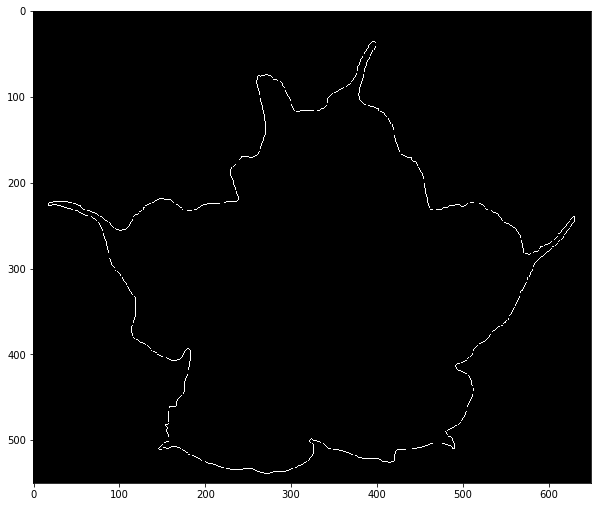

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import scipy.ndimage.morphology as morph

def my_boundary(img):
    """
    Compute boundary of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    boundary : ndarray of bools
        The boundary as a binary image.
    """
    
    boundary = np.zeros(img.shape,np.bool)
    
    # YOUR CODE HERE
    
    erosion = morph.binary_erosion(img)
    #thicker boundary with bigger structuring element eg.:
    #erosion = morph.binary_erosion(img,structure=np.ones((7,7)))
    boundary = np.logical_xor(erosion,img)
    
      
    
    return boundary
    
img = plt.imread("images/engelstrompete.png") > 0
plt.gray()
plt.figure(figsize=(10,10))
plt.imshow(my_boundary(img))
plt.show()

### b)  Distance transform

Implement distance transform according to the ideas of (CV-05 slides 34ff).  Discuss the effect of different structuring elements.

>### ***<font color='red'>fix edges of inverted distance transform below</font>***

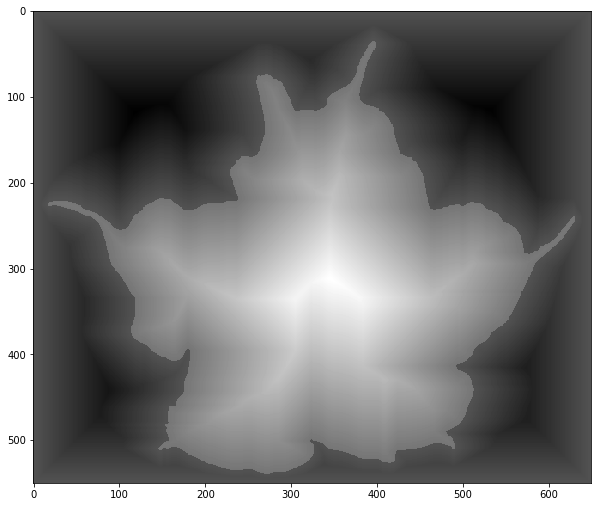

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph, generate_binary_structure

import itertools

def my_distance_transform(img):
    """
    Distance transform of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    dt : ndarray of ints
        The distance transform of the input image.
    """
    
    dt = np.zeros(img.shape,np.int32)
    
    # YOUR CODE HERE
    
    binary_image =  (img)
    binary_inverse = np.invert(img)                          #Inversion could be padded to get rid of the edge effect
    
    
    for i in itertools.count(0,1):
        if not np.any(binary_image):                         #break out of loop, when there is nothing left to erode
            break
    
        boundary = my_boundary(binary_image)
        dt[boundary] = i                                     #Assign the new boundary as its distance to the object to dt
        binary_image = morph.binary_erosion(binary_image)    #erode image to next boundary    

    
                                                             #same as above for the inversion
    for i in itertools.count(0,-1):
        if not np.any(binary_inverse):
            break
    
        boundary = my_boundary(binary_inverse)
        dt[boundary] = i
        binary_inverse = morph.binary_erosion(binary_inverse)

        
    return dt


img = plt.imread("images/engelstrompete.png") > 0
plt.figure(figsize=(10,10))
plt.imshow(my_distance_transform(img) + 50 * img)
plt.show()

***<font color='blue'>"Discuss the effect of different structuring elements."</font>***
> The size and shape of the structuring element dictates the respective distance metric. A 3x3 square e.g gives the chessboard distance, while a crossshaped element gives the city block distance.

### c) Morphing

Write a function `my_morph` that implements morphing according to (CV-05 slide 41). You may use your function `my_distance_transform` from part b), or the function `distance_transform_edt` from `scipy.ndimage.morphology`.

<Figure size 432x288 with 0 Axes>

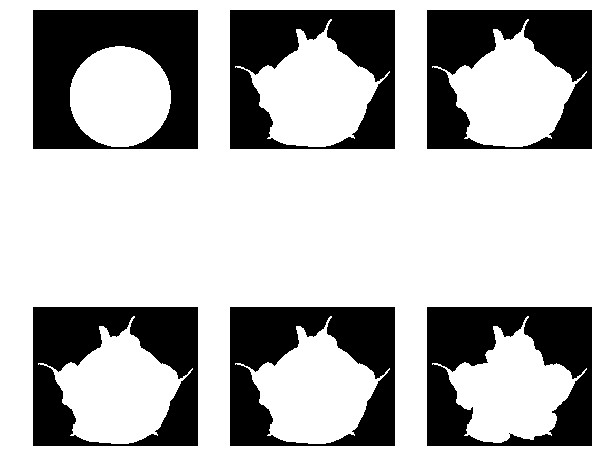

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph


def my_morph(A,B,ratio):
    """
    Morphing from binary image A to image B.

    Parameters
    ----------
    A : ndarray of bools
        A binary image (start).
    B : ndarray of bools
        A binary image (target), same shape as A.
    ratio : float from 0.0 to 1.0
        The ratio of image A and image B.
        0.0=only image A, 1.0=only image B.
        
    Returns
    -------
    morph : ndarray of bools
        A binary intermediate image between A and B.
    """

    result = np.zeros(A.shape,np.bool)
    # YOUR CODE HERE
    
    Da = morph.distance_transform_edt(A)
    Db = morph.distance_transform_edt(B)
    
    Di = ratio * Db + (1 - ratio) * Da                 #N = 1, because "1.0=only image B"
    result[np.where(Di>0)] = 1                         #binarize Di to get image morph image
         
    return result 

      

img1 = plt.imread("images/kreis.png") > 0
img2 = plt.imread("images/engelstrompete.png") > 0

plt.gray()
plt.figure(figsize=(10,10))
for i, ratio in enumerate(np.linspace(0, 1, 6), 1):
    plt.subplot(2, 3, i)
    plt.imshow(my_morph(img1, img2, ratio))
    plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


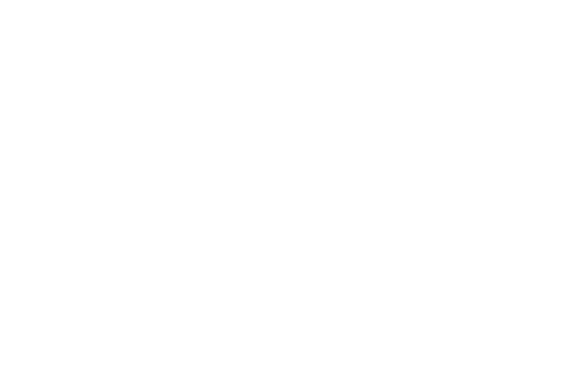

<IPython.core.display.Javascript object>


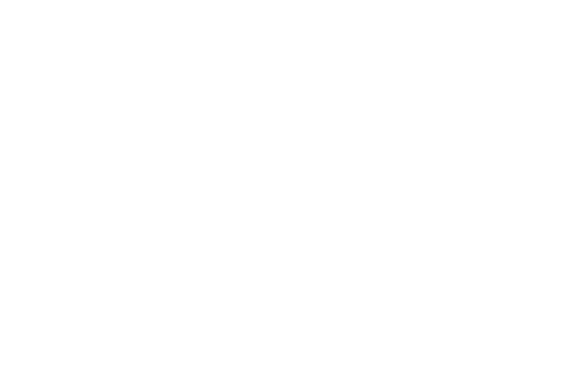

Traceback (most recent call last):
  File "D:\Programme\Anaconda\envs\cv\lib\site-packages\matplotlib\cbook\__init__.py", line 215, in process
    func(*args, **kwargs)
  File "D:\Programme\Anaconda\envs\cv\lib\site-packages\matplotlib\animation.py", line 1478, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [23]:
# If you want to see your morph as an animation, run this cell. 
# Close the output (press the blue "Stop interaction" button) once you are done!

# Due to some matplotlib problem you may have to restart your kernel!
%matplotlib notebook
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, ratio in enumerate(np.linspace(0, 1, 24), 1):
    plt.axis('off')
    im = plt.imshow(my_morph(img1, img2, ratio), cmap='gray', animated=True)
    ims.append([im])  
    
ani = animation.ArtistAnimation(fig, ims + list(reversed(ims)), interval=100, blit=True)

plt.show()

## Assignment 3: Implementation: Skeletonization [5 Points]

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 49).  

YOUR ANSWER HERE

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 50). Note that computing the skeleton using this method may take some time ...

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph

def my_skeletonize(img):
    """
    Compute the skeloton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """
    # YOUR CODE HERE


img = plt.imread("images/engelstrompete.png") > 0
skel = my_skeletonize(img)
result = morph.distance_transform_cdt(img, metric='taxicab') + (50 * img)
result[morph.binary_dilation(skel)] = 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(result)
plt.show()

RuntimeError: data type not supported

## Assignment 4: Custom Structuring Element [5 points]

Landsat 7 is a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: https://landsat.usgs.gov/slc-products-background


### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-05, 24ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images (CV-05, slide 52).  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
import scipy.ndimage as ndimg
from skimage.transform import rescale as rescale

angle = 15
thresh = 300
struc_elem = np.ones((7,1), dtype=np.bool)

img = plt.imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

# YOUR CODE HERE
img = (img - np.min(img))/np.ptp(img)
img3 = (img3 - np.min(img3))/np.ptp(img3)

plt.figure(figsize=(15,30))
plt.subplot(2,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(2,1,2); plt.imshow(img3); plt.axis('off')
plt.show()


### c) Bonus
Can you think of other ways to add the missing data? 


YOUR ANSWER HERE